<h1>Model Development</h1>

In this notebook, I'll develop a model for estimating car prices, based on the explaratory data analysis done in the previous notebook

<h4>Setup</h4>

 Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Loading data and storing it in a dataframe df:

In [2]:
# path of data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h3>1. Linear Regression and Multiple Linear Regression</h3>

<h4>Linear Regression</h4>

Loading the modules for linear regression

In [3]:
from sklearn.linear_model import LinearRegression

Creating the linear regression object

In [4]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Using Highway-mpg to help predict car price

In [6]:
X = df[['highway-mpg']]
Y = df['price']

Fitting the linear model using highway-mpg.

In [7]:
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Outputing a prediction 

In [8]:
Yhat=lm.predict(X)
for i in range(5) :
    print(Y[i], Yhat[i])

13495.0 16236.504643465414
16500.0 16236.504643465414
16500.0 17058.23802178734
13950.0 13771.304508499637
17450.0 20345.171535075042


<h4>What is the value of the intercept (a)?</h4>

In [9]:
lm.intercept_

38423.3058581574

<h4>What is the value of the Slope (b)?</h4>

In [10]:
lm.coef_

array([-821.73337832])

<h3>Final estimated linear model : </h3>

<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>

<h4>Repeating the above steps but with 'engine-size'</h4>


In [11]:
from sklearn.linear_model import LinearRegression
lm2 = LinearRegression()

In [12]:
X1 = df[['engine-size']]
Y1 = df[['price']]
lm2.fit(X1,Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<h4>Slope</h4>

In [14]:
lm2.intercept_

array([-7963.33890628])

<h4>Intercept</h4>

In [15]:
lm2.coef_

array([[166.86001569]])

<h4> Equation of the predicted line :

price = 166.86*engine-size - 7963.34 

<h3>Multiple Linear Regression</h3>

The equation is given by

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

<p>From the third notebook, other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>

In [16]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Fit the linear model using the four above-mentioned variables.

In [17]:
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

What is the value of the intercept(a)?

In [18]:
lm.intercept_

-15806.62462632922

What are the values of the coefficients (b1, b2, b3, b4)?

In [19]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

<h4> Final estimated linear model :

<b>price</b> = -15678.742628061467 + 52.65851272 x <b>horsepower</b> + 4.69878948 x <b>curb-weight</b> + 81.95906216 x <b>engine-size</b> + 33.58258185 x <b>highway-mpg</b>


 
    
    
    
<p>Creating and training a Multiple Linear Regression model "lm2" where the response variable is price, and the predictor variable is 'normalized-losses' and  'highway-mpg'. 
    

In [20]:
YY = df[['normalized-losses', 'highway-mpg']]
XX = df[['price']]
lm4 = LinearRegression()
lm4.fit(XX,YY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
lm4.coef_

array([[ 0.0005395 ],
       [-0.00060432]])

<h3>2)  Model Evaluation using Visualization</h3>

Importing the visualization package: seaborn

In [23]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h3>Regression Plot</h3>

Visualizing Horsepower as potential predictor variable of price:

(0.0, 48262.16032198962)

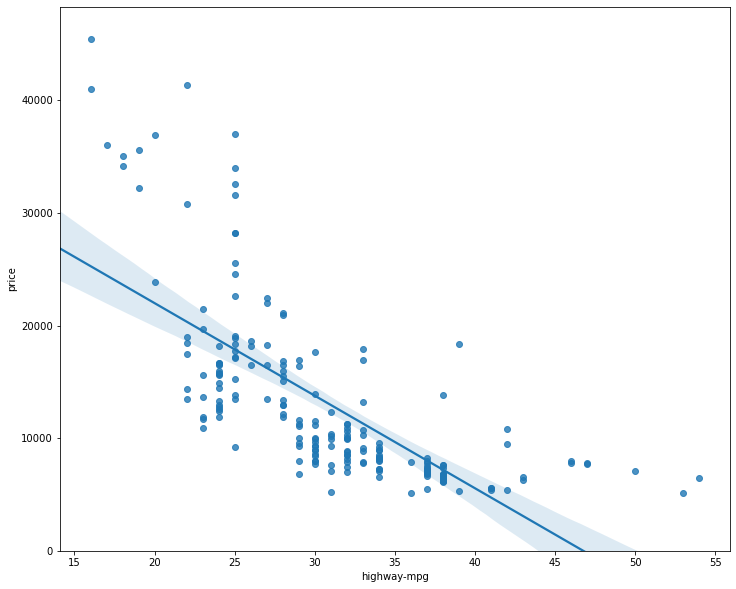

In [24]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

This plot shows that price is negatively correlated to highway-mpg, since the regression slope is negative.


<h4> Creating a regression plot for peak-rpm and price

(0.0, 47414.1)

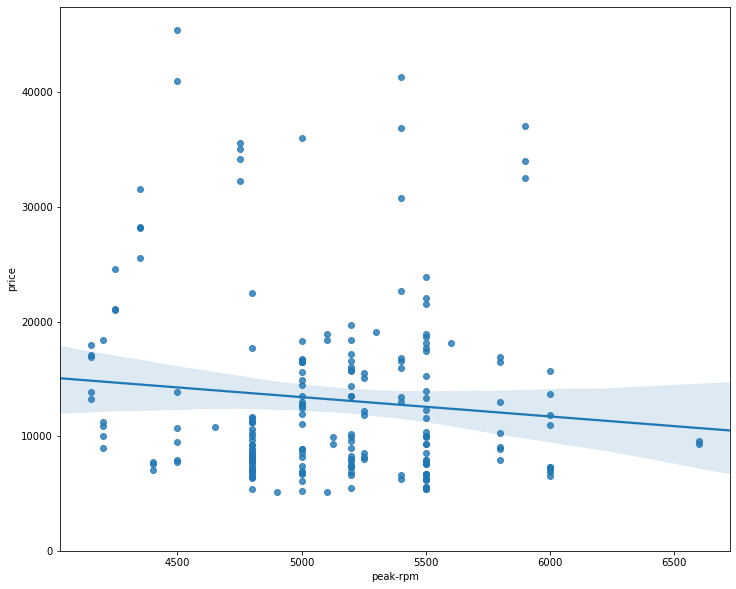

In [25]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.</p>

Using the method ".corr()" to verify above result

In [26]:
df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


<h3>Residual Plot</h3>


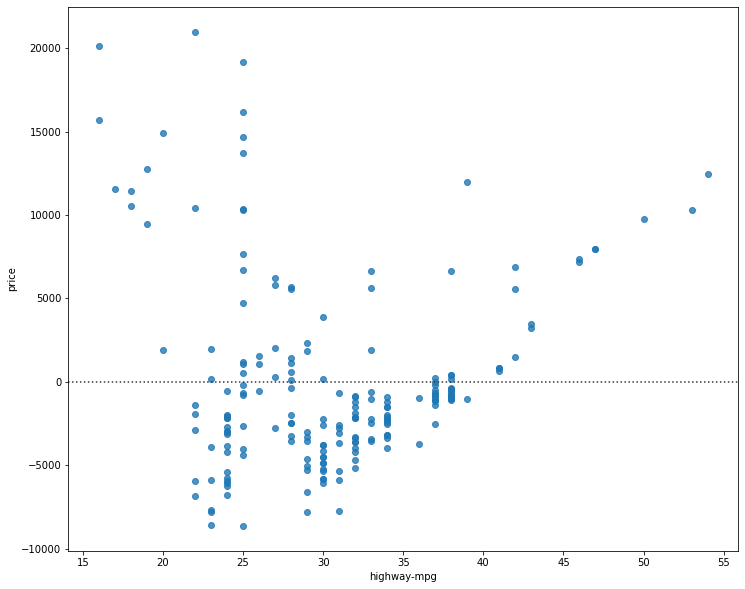

In [27]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

In this residual plot, the residuals are not randomly spread around the x-axis, which shows that a non-linear model would be more appropriate for this data.

<h3>Multiple Linear Regression</h3>

<h4> Distribution Plot 

First lets make a prediction 

In [28]:
Y_hat = lm.predict(Z)

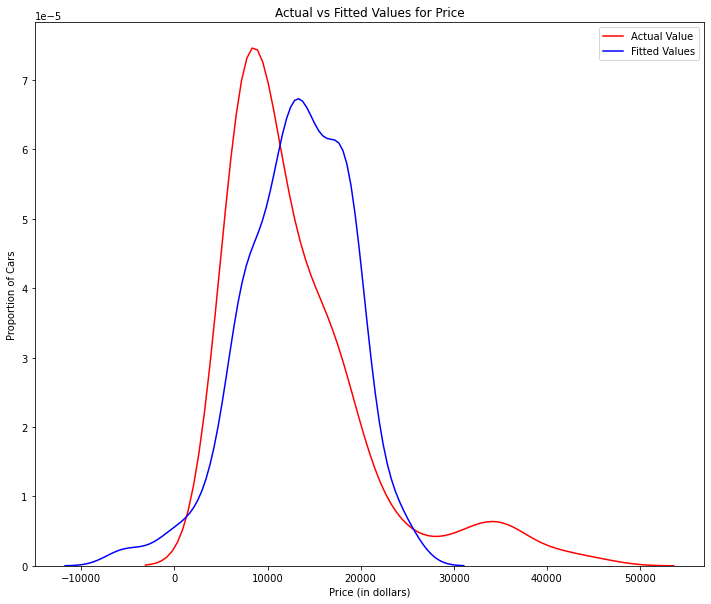

In [29]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>The fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

<h2>3) Polynomial Regression and Pipelines</h2>

Defining functions that will be used to plot data

In [30]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

Getting the variables

In [31]:
x = df['highway-mpg']
y = df['price']

Displaying the polynomial function.

In [32]:
# Using a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


 Let's plot the function 

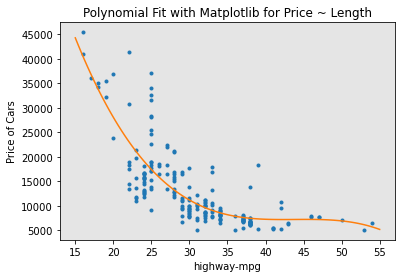

In [33]:
PlotPolly(p, x, y, 'highway-mpg')

In [34]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

<p>This polynomial model performs better than the linear model because the generated polynomial function covers more of the data points.</p>

<h2>Pipeline</h2>

The StandardScalar step will also be used in this pipeline

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

Creating the pipeline

In [39]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

Inputing the list as an argument to the pipeline constructor 

In [40]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

Normalizing the data,  performing a transform and fitting the model simultaneously. 

In [41]:
pipe.fit(Z,y)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [42]:
ypipe=pipe.predict(Z)
for i in range(5) :
    print(y[i], ypipe[i])

13495.0 13102.74784200705
16500.0 13102.74784200705
16500.0 18225.545721968527
13950.0 10390.296365553977
17450.0 16136.296191641852


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


<h2>4) Measures for In-Sample Evaluation</h2>

Mean Squared Error and R-Square will be used to evaluate the models

<h3>Model 1: Simple Linear Regression</h3>

Let's calculate the R^2

In [43]:
#highway_mpg_fit
lm.fit(X, Y)
# Finding the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


Let's calculate the MSE

In [44]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


Importing mean-squared error

In [45]:
from sklearn.metrics import mean_squared_error

Comparing the predicted results with the actual results 

In [46]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


<h3>Model 2: Multiple Linear Regression</h3>

Let's calculate the R^2

In [47]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


Let's calculate the MSE

In [48]:
Y_predict_multifit = lm.predict(Z)

In [49]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


<h3>Model 3: Polynomial Fit</h3>

Let's calculate the R^2

In [50]:
from sklearn.metrics import r2_score

Applying the function to get the value of r^2

In [51]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


<h3>MSE</h3>

Calculating the MSE:  

In [52]:
mean_squared_error(df['price'], p(x))

20474146.426361218

<h2>Part 5: Prediction and Decision Making</h2>
<h3>Prediction</h3>

In [53]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a new input 

In [54]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

 Fit the model 

In [55]:
lm.fit(X, Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Produce a prediction

In [56]:
yhat=lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

Plot the data 

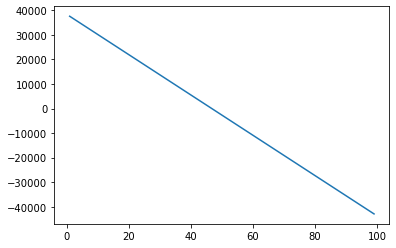

In [57]:
plt.plot(new_input, yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>

<h4>Evaluated values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.49659118843391759</li>
    <li>MSE: 3.16 x10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.80896354913783497</li>
    <li>MSE: 1.2 x10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.6741946663906514</li>
    <li>MSE: 2.05 x 10^7</li>
</ul>
</p>

<h3>Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)</h3>


<ul>
    <li><b>MSE</b>The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

R-squared in combination with the MSE shows that MLR seems like the better model fit in this case, compared to SLR.

<h3>Simple Linear Model (SLR) vs Polynomial Fit</h3>

<ul>
    <li><b>MSE</b>: Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.</p>

<h3>Multiple Linear Regression (MLR) vs Polynomial Fit</h3>

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>

<h2>Conclusion:</h2>

<p>Comparing these three models, we conclude that <b>the MLR model is the best model</b> to be able to predict price from our dataset.</p>